# Preprocess

---

<img src="https://raw.githubusercontent.com/jhyun0919/EnergyData_jhyun/master/docs/images/blueprint_preprocess.jpg" alt="Drawing" style="width: 800px;"/>

## 개요

* 각종 sensor data를 서로 비교&분석하기 위해서는 다음과 같은 조건이 만족되어야 함
         - 통일된 data length(start ts ~ end ts)
         - 일정한 time stamp interval
         - 정규화된 value data
         - 어떤 time stamp에 대해 value data가 비어 있다면 interpolation  
    
    * **Preprocess 과정은 Data Analysis를 하기전 반드시 필요한 과정임** 

---
# 01. Preprcess 과정

In [1]:
from utils import Preprocess
from utils import FileIO
from utils import GlobalParameter
from utils import Graph
%matplotlib inline
import os
import math
import pandas as pd

---
### 01-01. Check raw data

In [2]:
file_name = 'VTT_GW1_HA10_VM_EP_KV_K.bin'
sensor_data_path = os.path.join(GlobalParameter.RepositoryPath, 'VTT', file_name)
sensor_data_path


'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_EP_KV_K.bin'

In [3]:
data = FileIO.Load.unpickling(sensor_data_path)
data

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([[datetime.datetime(2013, 5, 15, 10, 37, 23), 23, 37, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 42, 30), 30, 42, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 47, 30), 30, 47, ..., 2, 15, 5],
        ..., 
        [datetime.datetime(2015, 6, 30, 0, 46, 32), 32, 46, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 51, 32), 32, 51, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 56, 32), 32, 56, ..., 1, 30, 6]], dtype=object),
 'value': array([     0.,      0.,      0., ...,  24826.,  24826.,  24826.])}

In [4]:
df = pd.DataFrame()

df['ts'] = data['ts'][:, 0]
df['value'] = data['value']
df

,ts,value
0,2013-05-15 10:37:23,0.0
1,2013-05-15 10:42:30,0.0
2,2013-05-15 10:47:30,0.0
3,2013-05-15 10:52:30,0.0
4,2013-05-15 10:57:31,0.0
5,2013-05-15 11:02:41,0.0
6,2013-05-15 11:07:41,0.0
7,2013-05-15 11:12:41,0.0
8,2013-05-15 11:17:41,0.0
9,2013-05-15 11:22:41,0.0


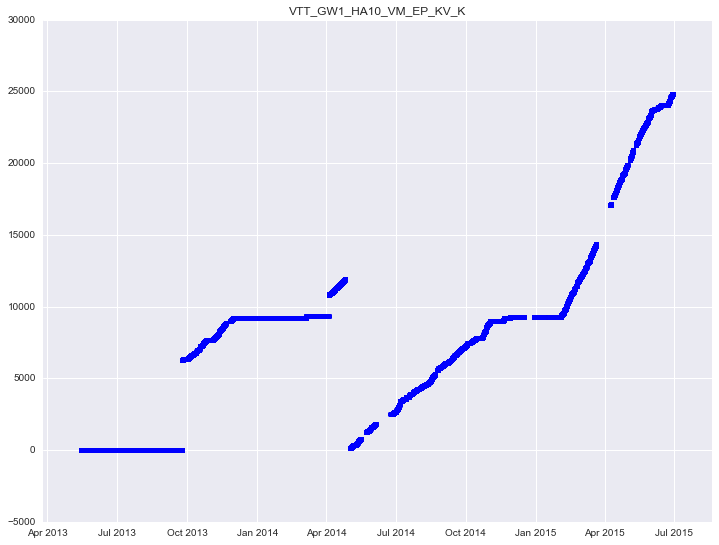

In [5]:
Graph.Show.raw_data2graph(sensor_data_path)

---
### 01-02. Unify the data length 

In [6]:
Preprocess.unify_data_length()

	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_KIINT_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_KIINT_KV_KO_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_TAVOIT_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW2_HA31_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_KV_KAM.bin
	> start_ts: 2013-05-16 00:00:00 from VTT_GW2_HA4_VM_EP_KV_K.bin
	> end_ts: 2015-06-30 00:00:00 fro

In [7]:
sensor_data_path = os.path.join(GlobalParameter.RepositoryPath, GlobalParameter.UnifyDataLengthPath, file_name)
sensor_data_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/length_unify/VTT_GW1_HA10_VM_EP_KV_K.bin'

In [8]:
data = FileIO.Load.unpickling(sensor_data_path)
data

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([[datetime.datetime(2013, 5, 16, 0, 0), 0, 48, ..., 3, 16, 5],
        [datetime.datetime(2013, 5, 16, 5, 48, 2), 2, 48, ..., 3, 16, 5],
        [datetime.datetime(2013, 5, 16, 6, 48, 5), 5, 48, ..., 3, 16, 5],
        ..., 
        [datetime.datetime(2015, 6, 29, 23, 46), 0, 46, ..., 0, 29, 6],
        [datetime.datetime(2015, 6, 29, 23, 51, 1), 1, 51, ..., 0, 29, 6],
        [datetime.datetime(2015, 6, 30, 0, 0), 10, 56, ..., 0, 29, 6]], dtype=object),
 'value': array([     0.,      0.,      0., ...,  24826.,  24826.,  24826.])}

In [9]:
df = pd.DataFrame()
df['ts'] = data['ts'][:, 0]
df['value'] = data['value']

In [10]:
df.iloc[0]

ts       2013-05-16 00:00:00
value                      0
Name: 0, dtype: object

In [11]:
df.iloc[-1]

ts       2015-06-30 00:00:00
value                  24826
Name: 190831, dtype: object

---
### 01-03. standarization of time stamp interval

In [12]:
data = Preprocess.ts_scaling(data, time_interval=GlobalParameter.TimeInterval)

df = pd.DataFrame()
df['ts'] = data['ts']
df['value'] = data['value']
df

,ts,value
0,2013-05-16,0.000000
1,2013-05-17,0.000000
2,2013-05-18,0.000000
3,2013-05-19,0.000000
4,2013-05-20,0.000000
5,2013-05-21,0.000000
6,2013-05-22,0.000000
7,2013-05-23,0.000000
8,2013-05-24,0.000000
9,2013-05-25,0.000000


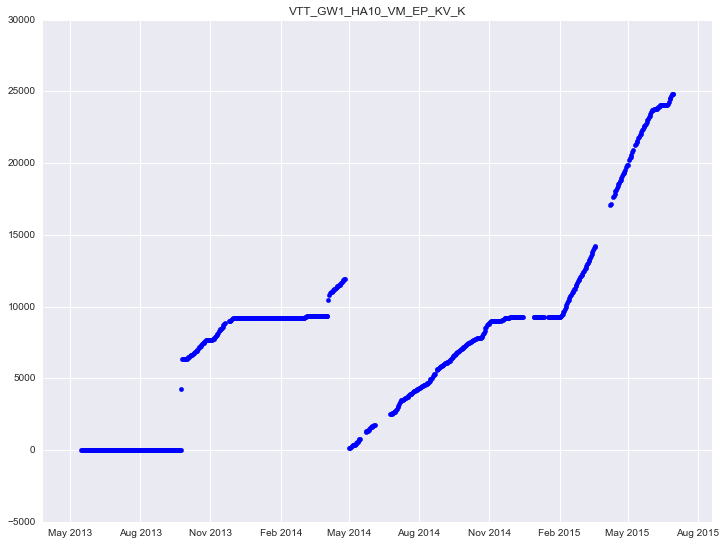

In [13]:
Graph.Show.dictionary2graph(data)

---
### 01-04. value data interpolation

In [14]:
nancounter = 0

for line in data['value']:
    if math.isnan(line):
        nancounter += 1
        
nancounter

82

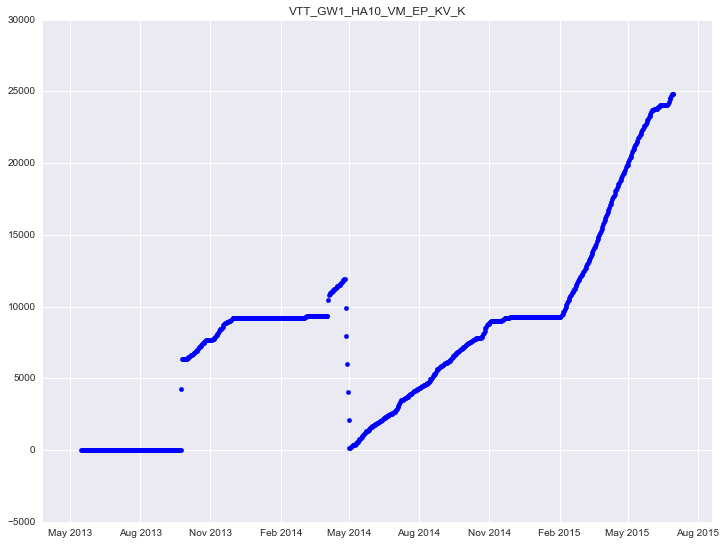

In [15]:
data = Preprocess.interpolation(data)
Graph.Show.dictionary2graph(data)

In [16]:
nancounter = 0

for line in data['value']:
    if math.isnan(line):
        nancounter += 1
        
nancounter

0

---
### 01-05. value data scaling

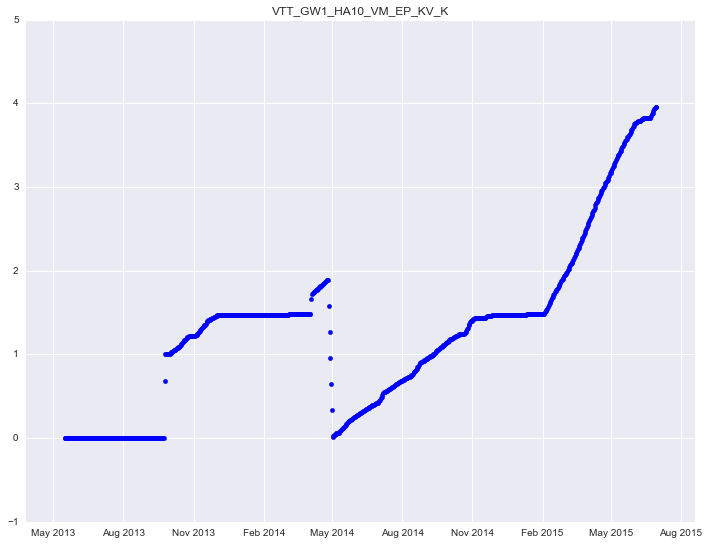

In [17]:
data = Preprocess.scaling(data)
Graph.Show.dictionary2graph(data)

---
# 02. A Command line for Preprocess

In [18]:
Preprocess.preprocess_data(time_interval=GlobalParameter, refined_type=GlobalParameter.FullyPreprocessedPath)

unify data length
	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA10_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW1_HA11_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_KIINT_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_KIINT_KV_KO_KAM.bin
	scanning start_ts & end_ts:  VTT_GW1_TAVOIT_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW2_HA31_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA35_VM_KV_KAM.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_EP_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_KV_K.bin
	scanning start_ts & end_ts:  VTT_GW2_HA4_VM_KV_KAM.bin
	> start_ts: 2013-05-16 00:00:00 from VTT_GW2_HA4_VM_EP_KV_K.bin
	> end_ts: 2015-

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/1440/fully_refined'